<a href="https://colab.research.google.com/github/Mya-mori/Kaggle/blob/master/COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23562 entries, 0 to 23561
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              23562 non-null  int64  
 1   Province_State  10010 non-null  object 
 2   Country_Region  23562 non-null  object 
 3   Date            23562 non-null  object 
 4   ConfirmedCases  23562 non-null  float64
 5   Fatalities      23562 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [4]:
train.head(3)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0


In [12]:
train["Country_Region"].unique(

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [9]:
train["Province_State"].value_counts()

Turks and Caicos Islands    77
Anhui                       77
South Carolina              77
New York                    77
Reunion                     77
                            ..
Shandong                    77
North Dakota                77
Martinique                  77
French Polynesia            77
Massachusetts               77
Name: Province_State, Length: 130, dtype: int64

In [47]:
train[["Fatalities","ConfirmedCases"]].describe()

,Fatalities,ConfirmedCases
count,23562.000000,23562.000000
mean,37.467617,801.323275
std,468.699337,6312.495888
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,74.000000
max,17127.000000,141942.000000


In [48]:
#今日のデータについて確認
todays_date = train["Date"].max()
todays_Con = sum(train[train['Date'] == todays_date].ConfirmedCases)
todays_Fat = sum(train[train['Date'] == todays_date].Fatalities)
print("number of countries = ", len(train["Country_Region"].unique()))
print("todays date is =", todays_date )
print("todays ConfirmedCases is =", todays_Con)
print("todays Fatalities is = ", todays_Fat)

number of countries =  180
todays date is = 2020-04-07
todays ConfirmedCases is = 1425900.0
todays Fatalities is =  81858.0


In [0]:
top_country_C = train[train["Date"] == todays_date].groupby(["Date", "Country_Region"]).sum().sort_values(["ConfirmedCases"], ascending = False)
#今日までデータの合計((train[train["Date"] == todays_date])sum())を"Date"と"Country_Region"を基準に見ていく
#sort_values → 列全体を移動させる[ConfirmedCases]を基準に

In [52]:
top_country.head(10)

Id  ConfirmedCases  Fatalities
Date       Country_Region                                     
2020-04-07 US              1497771        396063.0     12717.0
           Spain             23296        141942.0     14045.0
           Italy             15592        135586.0     17127.0
           France           126495        110064.0     10343.0
           Germany           13559        107663.0      2016.0
           China            249711         82718.0      3335.0
           Iran              15164         62589.0      3872.0
           United Kingdom   314815         55947.0      6171.0
           Turkey            24794         34109.0       725.0
           Switzerland       23831         22253.0       821.0

In [0]:
top_country_F = train[train["Date"] == todays_date].groupby(["Date", "Country_Region"]).sum().sort_values(["Fatalities"], ascending = False)

In [56]:
top_country_F.head(10)

Id  ConfirmedCases  Fatalities
Date       Country_Region                                     
2020-04-07 Italy             15592        135586.0     17127.0
           Spain             23296        141942.0     14045.0
           US              1497771        396063.0     12717.0
           France           126495        110064.0     10343.0
           United Kingdom   314815         55947.0      6171.0
           Iran              15164         62589.0      3872.0
           China            249711         82718.0      3335.0
           Netherlands       77990         19707.0      2108.0
           Belgium            2538         22194.0      2035.0
           Germany           13559        107663.0      2016.0

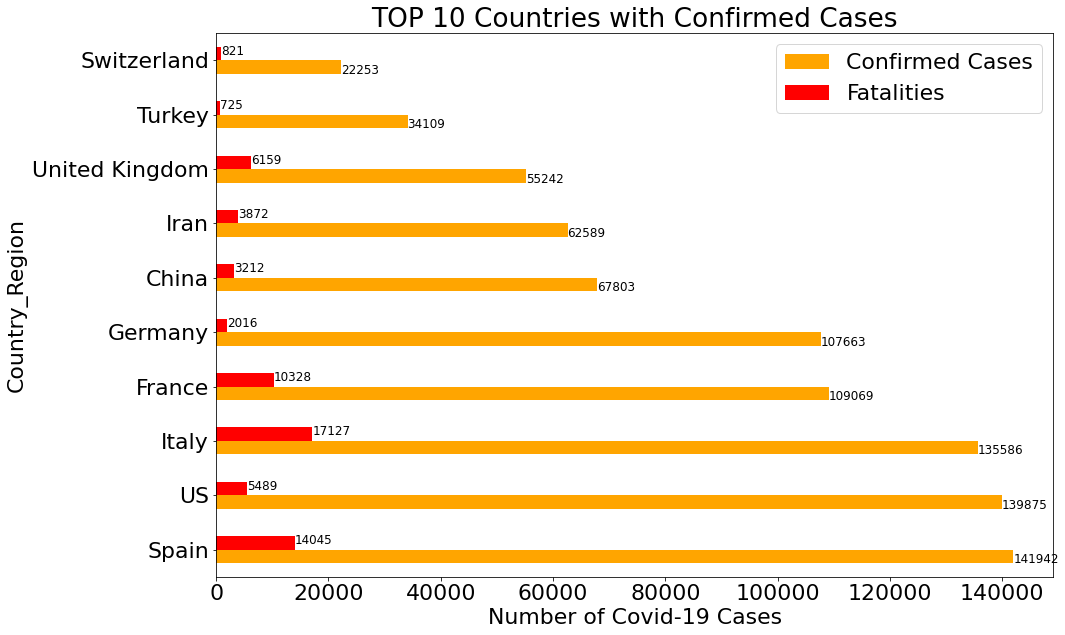

In [81]:
#国ごとに"ConfirmedCases"と"Fatalities"を示す

train_data_country =  train[train["Date"] == todays_date].groupby(["Country_Region"], as_index = True).agg({"ConfirmedCases" : "max", "Fatalities" : "max"})
#as_index = False → グループラベルをindexにしたくない時

train_data_country_confirm = train_data_country.sort_values(by = ["ConfirmedCases"], ascending = False)
#"ConfirmedCases"を基準に降順で示す

from itertools import cycle, islice

discrete_col = list(islice(cycle(['orange', 'r', 'g', 'k', 'b', 'c', 'm']), None, len(train_data_country_confirm.head(10))))

train_data_country_confirm.head(10).plot(figsize=(15,10), kind = 'barh', color=discrete_col)
"""
'line': 折れ線グラフ（line plot）
'bar': 垂直棒グラフ（vertical bar plot）
'barh': 水平棒グラフ（horizontal bar plot）
'box': 箱ひげ図（boxplot）
'hist' : ヒストグラム（histogram）
'kde', 'density': カーネル密度推定（Kernel Density Estimation plot）
'area': 面グラフ（area plot）
'scatter': 散布図（scatter plot）
'hexbin': hexbin plot
'pie': 円グラフ（pie plot）
"""
plt.legend(["Confirmed Cases", "Fatalities"])
plt.xlabel("Number of Covid-19 Cases")
plt.title("TOP 10 Countries with Confirmed Cases")

for i, v in enumerate(train_data_country_confirm.head(10)["ConfirmedCases"][:]):
    plt.text(v+0.01, ylocs[i]-0.25, str(int(v)), fontsize=12)
    
for i, v in enumerate(train_data_country_confirm.head(10)["Fatalities"][:]):
    if v > 200: 
        plt.text(v+0.01,ylocs[i]+0.1,str(int(v)),fontsize=12) 